In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

seed = 1234
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
x_train = pd.read_csv('/Users/mukund/Documents/Study/Winter 2023/ECE657A DKMA/Assignment 3/ece657a-1221-asg3-fashionmnist-datafiles/x_train.csv').values
x_test = pd.read_csv('/Users/mukund/Documents/Study/Winter 2023/ECE657A DKMA/Assignment 3/ece657a-1221-asg3-fashionmnist-datafiles/x_test.csv').values

In [3]:
x_train = x_train.reshape((-1, 28, 28, 1)) 
x_test = x_test.reshape((-1, 28, 28, 1))


In [4]:
y_train = pd.read_csv('/Users/mukund/Documents/Study/Winter 2023/ECE657A DKMA/Assignment 3/ece657a-1221-asg3-fashionmnist-datafiles/y_train.csv').values
y_test = pd.read_csv('/Users/mukund/Documents/Study/Winter 2023/ECE657A DKMA/Assignment 3/ece657a-1221-asg3-fashionmnist-datafiles/y_test.csv').values

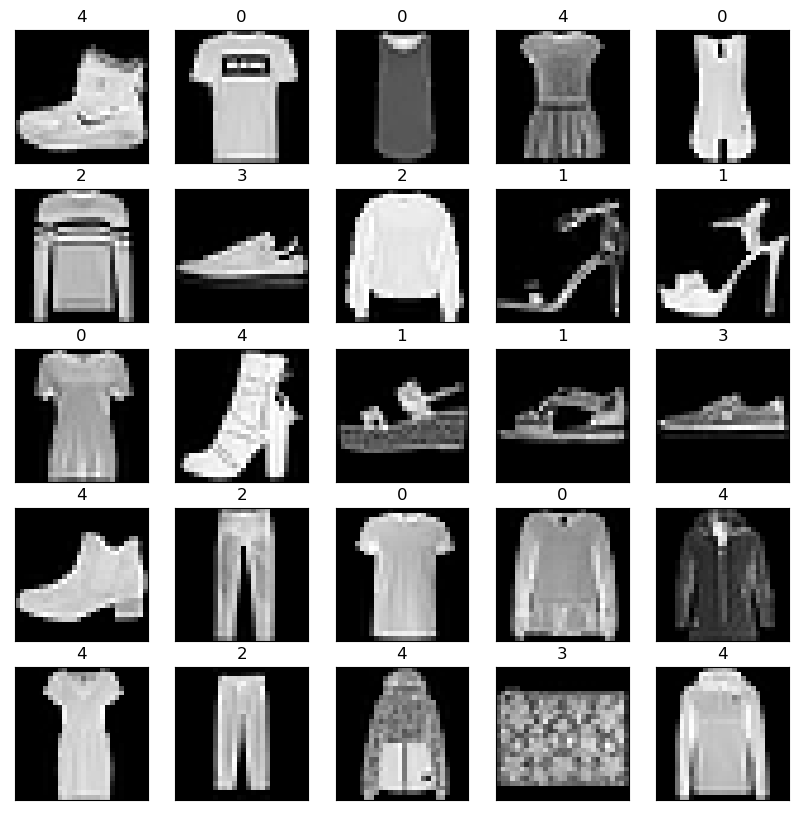

In [5]:
fig, ax = plt.subplots(5,5,figsize = (10,10))
for i in range(25):
  #ax[i].set_title(str(y_train[i]))
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  #plt.imshow(x_train[i].reshape((28,28)))
  #label_index = int(y_train[i])
  plt.title(str(int(y_train[i])))
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

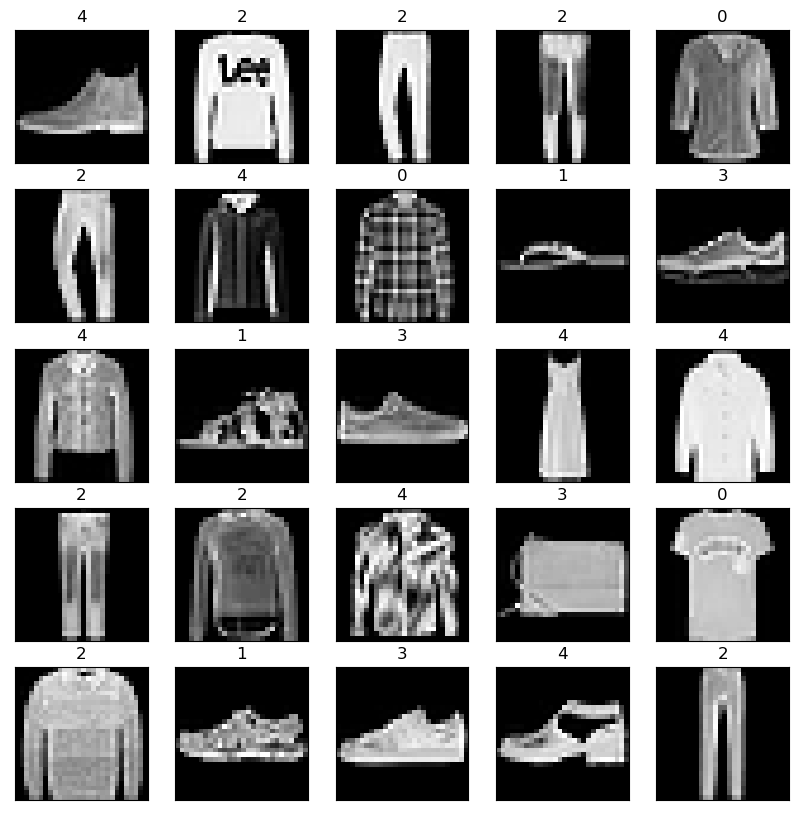

In [6]:
fig, ax = plt.subplots(5,5,figsize = (10,10))
for i in range(25):
  #ax[i].set_title(str(y_train[i]))
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  #plt.imshow(x_train[i].reshape((28,28)))
  #label_index = int(y_train[i])
  plt.title(str(int(y_test[i])))
  plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
plt.show()

In [7]:
num_classes = 5
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

### CNN Model

In [8]:
from genericpath import sameopenfile
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'same', strides = 1, input_shape = x_train[0].shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=2) ,
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'same', strides = 1, input_shape = x_train[0].shape),
    BatchNormalization(),
    Flatten(), 
    #Dense(32,activation='relu'),
    Dense(5,activation = 'softmax')
    
])

cnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                        

In [9]:
epoch = 50
cnn_model.compile(loss ='categorical_crossentropy', optimizer= 'SGD',metrics =['accuracy'])
start1 = time.time()
history = cnn_model.fit(x_train, Y_train, batch_size = 128, epochs= epoch, validation_split = 0.1, shuffle = False, verbose = 0)
stop1 = time.time()

In [10]:
print('Time Taken for training model - {:.2f}s'.format(stop1 - start1))

Time Taken for training model - 847.62s


Text(0, 0.5, 'Loss')

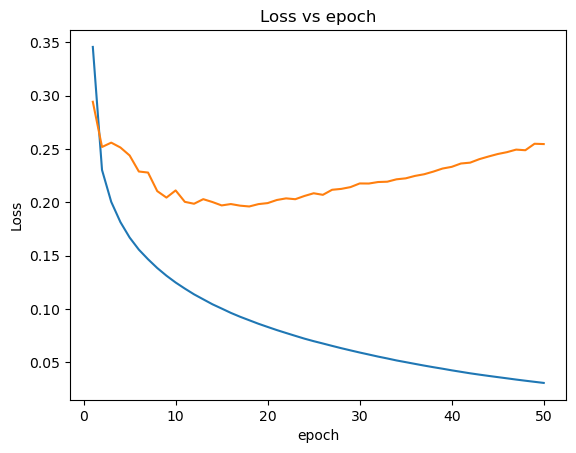

In [11]:
plt.plot(range(1, epoch+1), history.history['loss'], label='train')
plt.plot(range(1, epoch+1), history.history['val_loss'], label='validation')
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

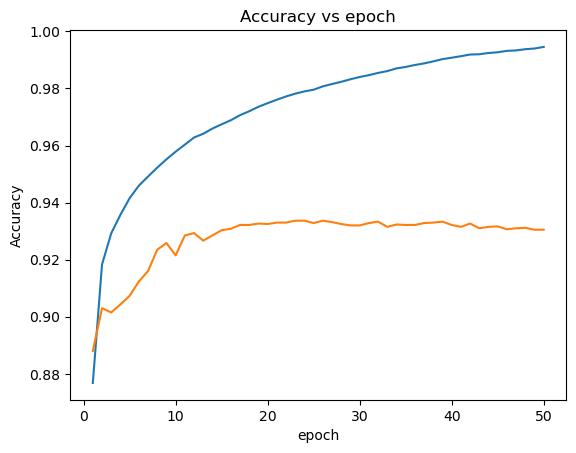

In [12]:
plt.plot(range(1, epoch+1), history.history['accuracy'], label='train')
plt.plot(range(1, epoch+1), history.history['val_accuracy'], label='validation')
plt.title('Accuracy vs epoch')
plt.xlabel('epoch')
plt.ylabel('Accuracy')

In [13]:
print(max(history.history['val_accuracy']))
history.history['val_accuracy'].index(max(history.history['val_accuracy']))

0.9336666464805603


22

In [14]:
history.history['val_loss'].index(min(history.history['val_loss']))

17

In [15]:
min(history.history['val_loss'])

0.19611212611198425

Max Validation Accuracy is achieved when Epochs = 9. Beyond this value, the Training accuracy improves while the validation accuracy decreases as the model is overfit due to continuous training.

Min validation loss is obtained at Epochs=8 but as the difference is minimal when compared to Epochs=20, we fix the no. of epochs as 20

Question 2

In [16]:
n_nets = 3
cnn_model_1 = [0] * n_nets

for i in range(3):
    cnn_model_1[i] = Sequential()
    cnn_model_1[i].add(Conv2D(16,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    cnn_model_1[i].add(BatchNormalization())
    if i > 0:
        cnn_model_1[i].add(MaxPooling2D(pool_size=2))
        cnn_model_1[i].add(Conv2D(32,kernel_size=5,padding='same',activation='relu'))
        cnn_model_1[i].add(BatchNormalization())
    if i > 1:
        cnn_model_1[i].add(MaxPooling2D(pool_size=2))
        cnn_model_1[i].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        cnn_model_1[i].add(BatchNormalization())
    cnn_model_1[i].add(Flatten())
    cnn_model_1[i].add(Dense(64, activation='relu'))
    cnn_model_1[i].add(Dense(5, activation='softmax'))
    cnn_model_1[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
# CREATE VALIDATION SET
# TRAIN NETWORKS
model_results_1 = [0] * n_nets
names = ["Model1-L1","Model2-L2","Model3-L3"]
epochs = 30
for i in range(n_nets):
    model_results_1[i] = cnn_model_1[i].fit(x_train,Y_train, batch_size=128, epochs = epochs, validation_split = 0.1, verbose = 0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[i],epochs,max(model_results_1[i].history['accuracy']),max(model_results_1[i].history['val_accuracy']) ))

CNN Model1-L1: Epochs=30, Train accuracy=0.99848, Validation accuracy=0.92633
CNN Model2-L2: Epochs=30, Train accuracy=0.99798, Validation accuracy=0.93967
CNN Model3-L3: Epochs=30, Train accuracy=0.99604, Validation accuracy=0.93917


Model1-L1 0.9263333082199097
Model2-L2 0.9396666884422302
Model3-L3 0.9391666650772095


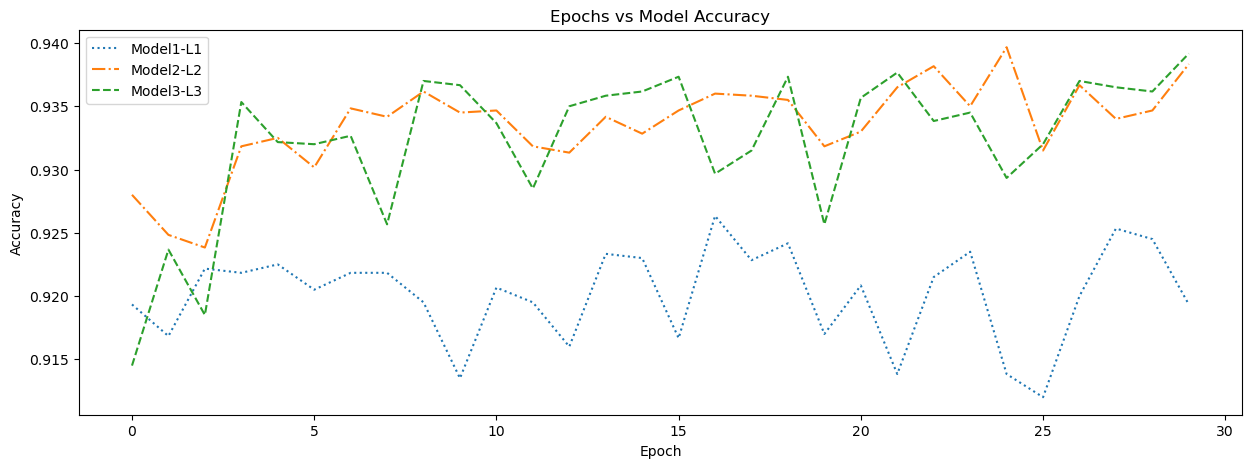

In [18]:
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']
plt.figure(figsize=(15,5))
for i in range(n_nets):
    plt.plot(model_results_1[i].history['val_accuracy'],linestyle=styles[i])
    print(names[i], max(model_results_1[i].history['val_accuracy']))
plt.title('Epochs vs Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

Based on the plot, it is evident that accuracy is high for the model when it has 3 Convolutional layers. But as the accuracy difference is minimal, we will proceed with 2 layers considering the computational cost.



## N Filters

In [19]:
n_nets = 3
cnn_models_2 = [0] * n_nets
filters = [(16,32),(32,64),(64,128)]
for i,filter in enumerate(filters):
    cnn_models_2[i] = Sequential()
    cnn_models_2[i].add(Conv2D(filter[0],kernel_size=5,activation='relu',input_shape=(28,28,1)))
    cnn_models_2[i].add(BatchNormalization())
    cnn_models_2[i].add(MaxPooling2D())
    cnn_models_2[i].add(Conv2D(filter[1],kernel_size=5,activation='relu'))
    cnn_models_2[i].add(BatchNormalization())
    cnn_models_2[i].add(Flatten())
    cnn_models_2[i].add(Dense(64, activation='relu'))
    cnn_models_2[i].add(Dense(5, activation='softmax'))
    cnn_models_2[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
model_results_2 = [0] * n_nets
names = ["Model1-(16,32)","Model2-(32,64)","Model3-(64,128)"]
epochs = 30

for i in range(n_nets):
    model_results_2[i] = cnn_models_2[i].fit(x_train,Y_train, batch_size=128, epochs = epochs, validation_split = 0.1, verbose = 0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[i],epochs,max(model_results_2[i].history['accuracy']),max(model_results_2[i].history['val_accuracy']) ))

CNN Model1-(16,32): Epochs=30, Train accuracy=0.99796, Validation accuracy=0.93317
CNN Model2-(32,64): Epochs=30, Train accuracy=0.99641, Validation accuracy=0.93883
CNN Model3-(64,128): Epochs=30, Train accuracy=0.99589, Validation accuracy=0.94250


Model1-(16,32) 0.9331666827201843
Model2-(32,64) 0.9388333559036255
Model3-(64,128) 0.9424999952316284


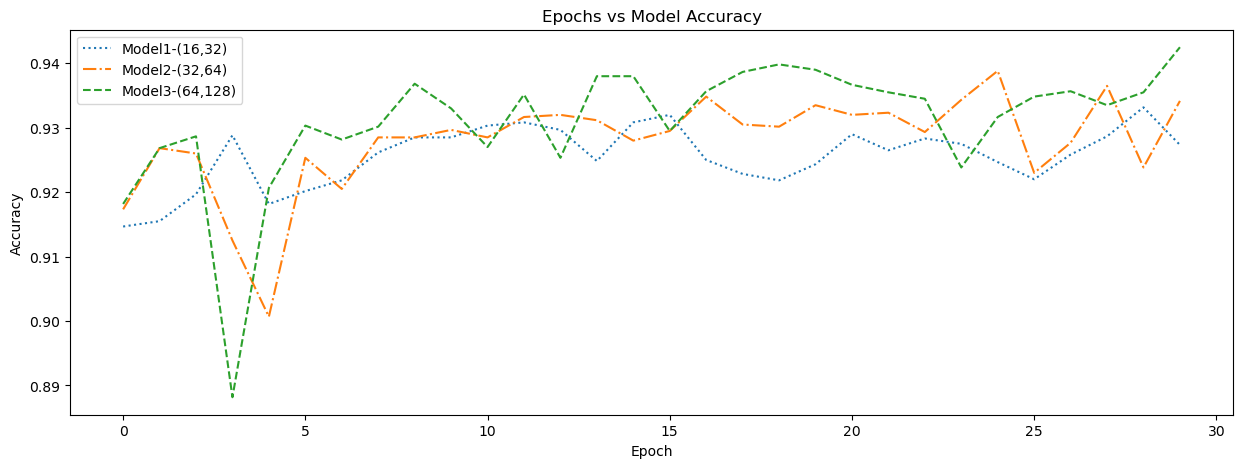

In [21]:
plt.figure(figsize=(15,5))
for i in range(n_nets):
    plt.plot(model_results_2[i].history['val_accuracy'],linestyle=styles[i])
    print(names[i], max(model_results_2[i].history['val_accuracy']))
plt.title('Epochs vs Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

Based on the plot, it is evident that accuracy is high when first layer in the model has 64 filters and second layer has 128 filters

Adding Dense Layer

In [22]:
n_nets = 4
cnn_models_3 = [0] * n_nets
dense_units = [32, 64, 128, 256]
for i,unit in enumerate(dense_units):
    cnn_models_3[i] = Sequential()
    cnn_models_3[i].add(Conv2D(64,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    cnn_models_3[i].add(BatchNormalization())
    cnn_models_3[i].add(MaxPooling2D())
    cnn_models_3[i].add(Conv2D(128,kernel_size=5,activation='relu'))
    cnn_models_3[i].add(BatchNormalization())
    cnn_models_3[i].add(Flatten())
    cnn_models_3[i].add(Dense(unit, activation='relu'))
    cnn_models_3[i].add(Dense(5, activation='softmax'))
    cnn_models_3[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
model_results_3 = [0] * n_nets
names = ["Model1-(32)","Model2-(64)","Model3-(128)", "Model4-(256)"]
epochs = 30

for i in range(n_nets):
    model_results_3[i] = cnn_models_3[i].fit(x_train,Y_train, batch_size=128, epochs = epochs, validation_split = 0.1, verbose = 0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[i],epochs,max(model_results_3[i].history['accuracy']),max(model_results_3[i].history['val_accuracy']) ))

CNN Model1-(32): Epochs=30, Train accuracy=0.99641, Validation accuracy=0.93800
CNN Model2-(64): Epochs=30, Train accuracy=0.99661, Validation accuracy=0.94100
CNN Model3-(128): Epochs=30, Train accuracy=0.99685, Validation accuracy=0.94550
CNN Model4-(256): Epochs=30, Train accuracy=0.99722, Validation accuracy=0.94367


In [24]:
plt.figure(figsize=(15,5))
for i in range(n_nets):
    plt.plot(model_results[i].history['val_accuracy'],linestyle=styles[i])
    print(names[i], max(model_results[i].history['val_accuracy']))
plt.title('Epochs vs Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

NameError: name 'model_results' is not defined

<Figure size 1500x500 with 0 Axes>

Based on the plot, it is evident that accuracy is high for dense layer with 256 units. But as the accuracy difference is minimal we are proceeding with dense layer with 64 units considering the computational time and cost.

DropOut 

In [ ]:
n_nets = 3
cnn_models_4 = [0] *n_nets
dropout_units = [0.2, 0.3, 0.4]

for i,unit in enumerate(dropout_units):
    cnn_models_4[i] = Sequential()
    cnn_models_4[i].add(Conv2D(64,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    cnn_models_4[i].add(Dropout(unit))
    cnn_models_4[i].add(BatchNormalization())
    cnn_models_4[i].add(MaxPooling2D())
    cnn_models_4[i].add(Conv2D(128,kernel_size=5,activation='relu'))
    cnn_models_4[i].add(Dropout(unit))
    cnn_models_4[i].add(BatchNormalization())
    cnn_models_4[i].add(MaxPooling2D())
    cnn_models_4[i].add(Flatten())
    cnn_models_4[i].add(Dense(64, activation='relu'))
    cnn_models_4[i].add(Dropout(unit))
    cnn_models_4[i].add(Dense(5, activation='softmax'))
    cnn_models_4[i].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
model_results_4 = [0] * n_nets
names = ["Model1-(0.2)","Model2-(0.3)","Model3-(0.4)"]
epochs = 30

for i in range(n_nets):
    model_results_4[i] = cnn_models_4[i].fit(x_train,Y_train, batch_size=128, epochs = epochs, validation_split = 0.1, verbose = 0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
    names[i],epochs,max(model_results_4[i].history['accuracy']),max(model_results_4[i].history['val_accuracy']) ))

In [ ]:
plt.figure(figsize=(15,5))
for i in range(n_nets):
    plt.plot(model_results_4[i].history['val_accuracy'],linestyle=styles[i])
    print(names[i], max(model_results_4[i].history['val_accuracy']))
plt.title('Epochs vs Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
plt.show()

In [ ]:
print(max(model_results_4[0].history['val_accuracy']))
model_results_4[0].history['val_accuracy'].index(max(model_results_4[0].history['val_accuracy']))

In [ ]:
own_model = Sequential()
own_model.add(Conv2D(64,kernel_size=5,activation='relu',input_shape=(28,28,1)))
own_model.add(Dropout(0.2))
own_model.add(BatchNormalization())
own_model.add(MaxPooling2D())
own_model.add(Conv2D(128,kernel_size=5,activation='relu'))
own_model.add(Dropout(0.2))
own_model.add(BatchNormalization())
own_model.add(MaxPooling2D())
own_model.add(Flatten())
own_model.add(Dense(64, activation='relu'))
own_model.add(Dropout(0.2))
own_model.add(Dense(5, activation='softmax'))
own_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



In [ ]:
import time

In [ ]:
start_time2 = time.time()
own_model_result = own_model.fit(x_train,Y_train, batch_size=128, epochs = 15, validation_split = 0.1, verbose = 0)
end_time2 = time.time()
run_time2 = end_time2 - start_time2
print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format('Own Model',15,max(own_model_result.history['accuracy']),max(own_model_result.history['val_accuracy']) ))

#ToDo Change epochs value above

# Qn 4

In [ ]:
#encoding
encoded_model = keras.Model(own_model.layers[0].input, own_model.layers[9].output)
encoded_model.summary()

In [ ]:
X_encoded = encoded_model(x_test)

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2, random_state = 54)
X_pca = pca.fit_transform(X_encoded)

In [ ]:
sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue=y_test.ravel(), palette="bright")
plt.title('PCA of Encoded data')
plt.plot()